In [41]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
#read csv file 
df = pd.read_csv("imdb_top_1000.csv")

In [44]:
#Shape of the data
df.shape

(1000, 16)

In [45]:
#colunms name
column_names = df.columns.tolist()
column_names

['Poster_Link',
 'Series_Title',
 'Released_Year',
 'Certificate',
 'Runtime',
 'Genre',
 'IMDB_Rating',
 'Overview',
 'Meta_score',
 'Director',
 'Star1',
 'Star2',
 'Star3',
 'Star4',
 'No_of_Votes',
 'Gross']

In [50]:
df.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444


# Clean and preprocess the data

In [54]:
#The sum of missing values
df.isna().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [55]:
#The sum of missing values before missing value
count_NAN =df.isna().sum().sum()
count_NAN

0

In [57]:
columns_to_drop = ['Overview', 'Poster_Link']
df = df.drop(columns=columns_to_drop)

In [52]:
df['Certificate']=df['Certificate'].fillna('Missing Value')

In [49]:
# Remove commas and convert to float
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = df['Gross'].astype('float64')
df['Gross'] = df['Gross'].replace(np.nan, 0)
df['Gross'] = df['Gross'].astype(int)

In [53]:
# Fill missing values with the mean
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())

In [58]:
#The sum of missing values after missing value
count_NAN =df.isna().sum().sum()
count_NAN

0

In [59]:
df.head(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411


In [ ]:
Series_Title ,Released_Year ,Certificate ,Runtime ,Genre ,IMDB_Rating ,Meta_score ,Director ,Star1 ,Star2 ,Star3 ,Star4 ,No_of_Votes ,Gross

In [145]:
genres = df['Genre']

genre_counts = genres.value_counts()

# Sort the genre counts in descending order
sorted_genres = genre_counts.sort_values(ascending=False)

most_popular_genre = sorted_genres.index[0]

print("The most popular genre of movies and TV shows is:", most_popular_genre)


The most popular genre of movies and TV shows is: Drama


In [146]:
# Create a new DataFrame using the genre counts
genre_counts_df = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})
genre_counts_df

,Genre,Count
0,Drama,85
1,"Drama, Romance",37
2,"Comedy, Drama",35
3,"Comedy, Drama, Romance",31
4,"Action, Crime, Drama",30
...,...,...
197,"Adventure, Thriller",1
198,"Animation, Action, Sci-Fi",1
199,"Action, Crime, Comedy",1
200,"Animation, Crime, Mystery",1


In [147]:
sorted_genres

Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Action, Adventure, Family     1
Biography, Drama, Romance     1
Adventure, History, War       1
Drama, History, Music         1
Adventure, Comedy, War        1
Name: Genre, Length: 202, dtype: int64

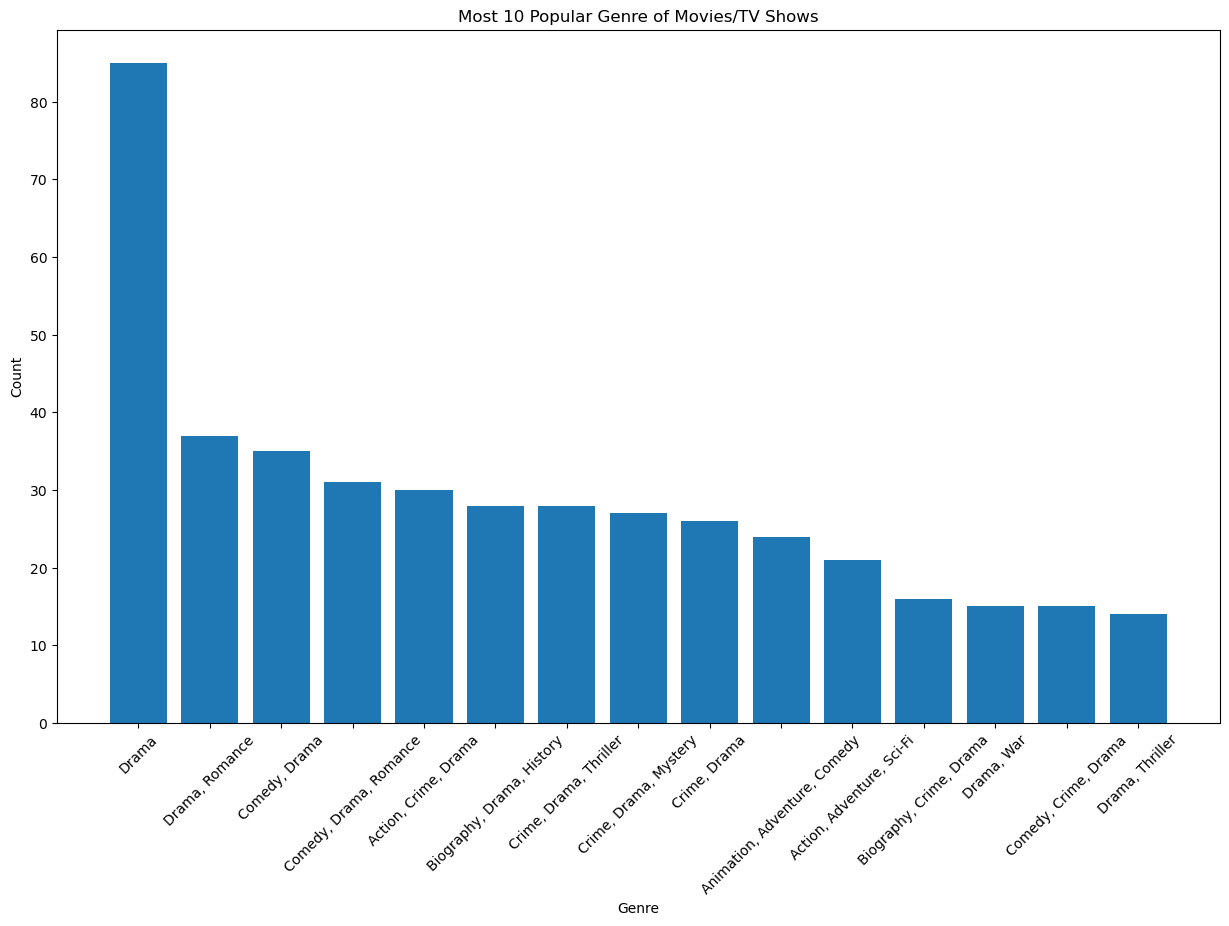

In [159]:
plt.figure(figsize=(15, 9))
top_10_genres = genre_counts.sort_values(ascending=False).head(15)
plt.bar(top_10_genres.index, top_10_genres.values)

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Most 10 Popular Genre of Movies/TV Shows')
plt.xticks(rotation=45)
plt.show()

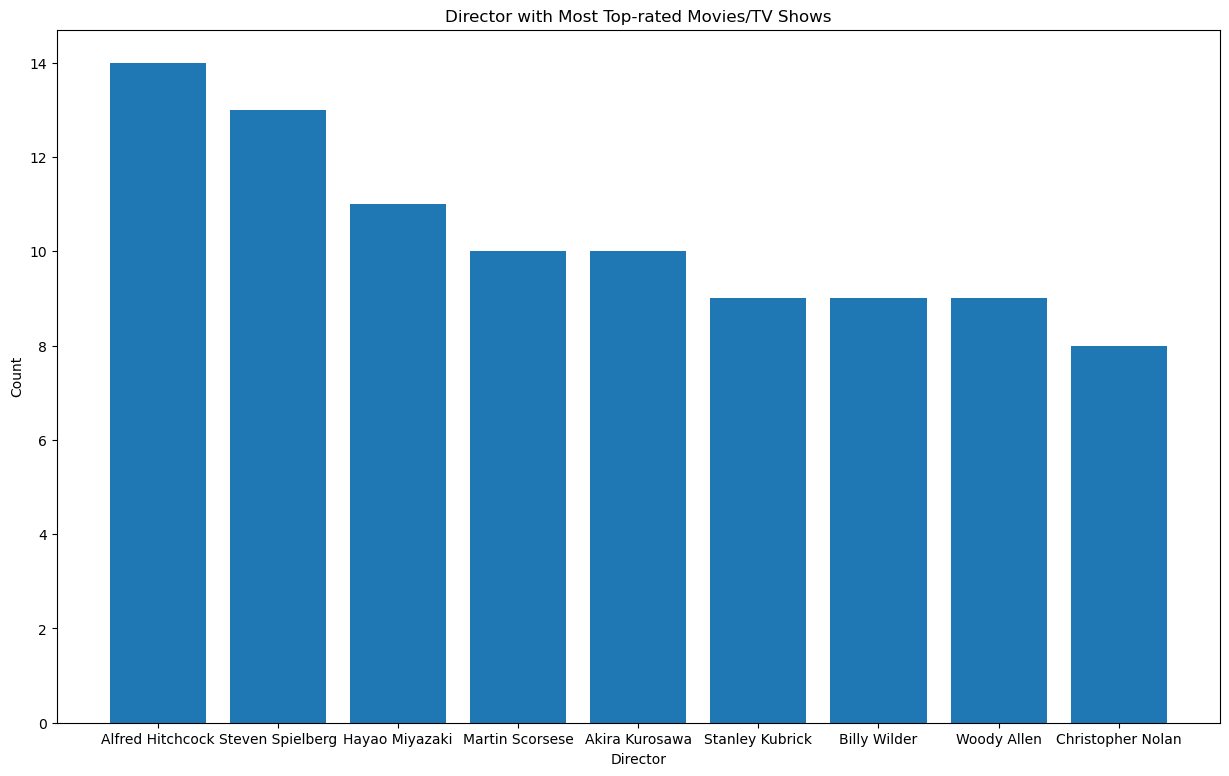

In [114]:
plt.figure(figsize=(15, 9))

top_director = director_counts_df.head(9)

plt.bar(top_director.index, top_director['Count'])

plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Director with Most Top-rated Movies/TV Shows')

plt.show()

In [ ]:
the Report on  READM file in github